# Retail Gaint Sales Forecasting 
<hr>

## Analysing the Data

In [1]:
#Importing essential libs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv('Global+Superstore+Data.csv')
data.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [3]:
#checking dtype

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [4]:
#Number of rows and columns

data.shape

(51290, 5)

In [5]:
#summary of all the numeric columns in the dataset

data.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


In [6]:
data.isnull().sum()

Order Date    0
Segment       0
Market        0
Sales         0
Profit        0
dtype: int64

In [7]:
data.nunique()

Order Date     1430
Segment           3
Market            7
Sales         22995
Profit        24575
dtype: int64

## Data Cleaning and Preparation
<hr>

In [8]:
#changing format of order-date

data['Order Date'] = pd.to_datetime(data['Order Date'],format ='%d-%m-%Y').dt.to_period('m')

In [9]:
data.head()

,Order Date,Segment,Market,Sales,Profit
0,2012-07,Consumer,US,2309.650,762.1845
1,2013-02,Corporate,APAC,3709.395,-288.7650
2,2013-10,Consumer,APAC,5175.171,919.9710
3,2013-01,Home Office,EU,2892.510,-96.5400
4,2013-11,Consumer,Africa,2832.960,311.5200


In [10]:
#creating market segments

data['Market_Segment'] = data['Market']+'_'+data['Segment']

In [11]:
data.head()

,Order Date,Segment,Market,Sales,Profit,Market_Segment
0,2012-07,Consumer,US,2309.650,762.1845,US_Consumer
1,2013-02,Corporate,APAC,3709.395,-288.7650,APAC_Corporate
2,2013-10,Consumer,APAC,5175.171,919.9710,APAC_Consumer
3,2013-01,Home Office,EU,2892.510,-96.5400,EU_Home Office
4,2013-11,Consumer,Africa,2832.960,311.5200,Africa_Consumer


In [12]:
data.Market.value_counts()

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64


- We can see that there are 7 Geographical Locations

In [13]:
data.Segment.value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

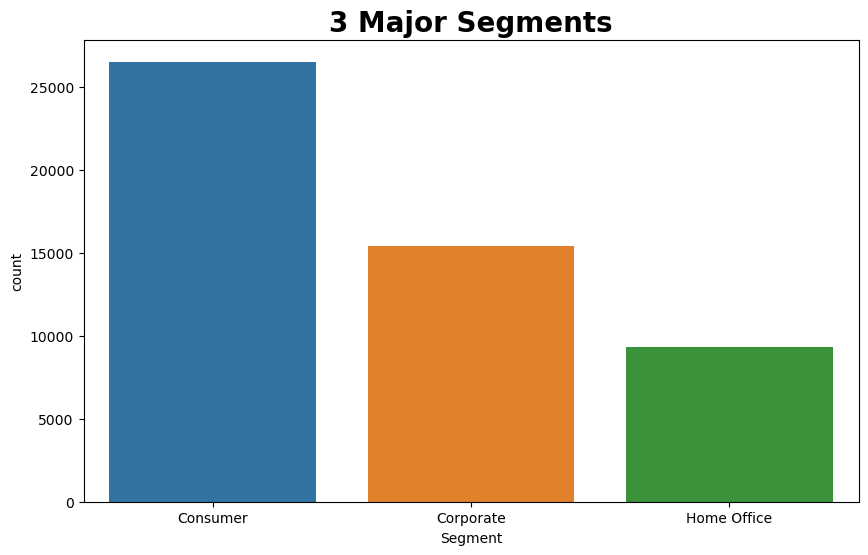

In [14]:
#Plotting 3 major segments

plt.figure(figsize=(10,6))
sns.countplot(data['Segment'])
plt.title('3 Major Segments',fontweight='bold', size=20)
plt.show()

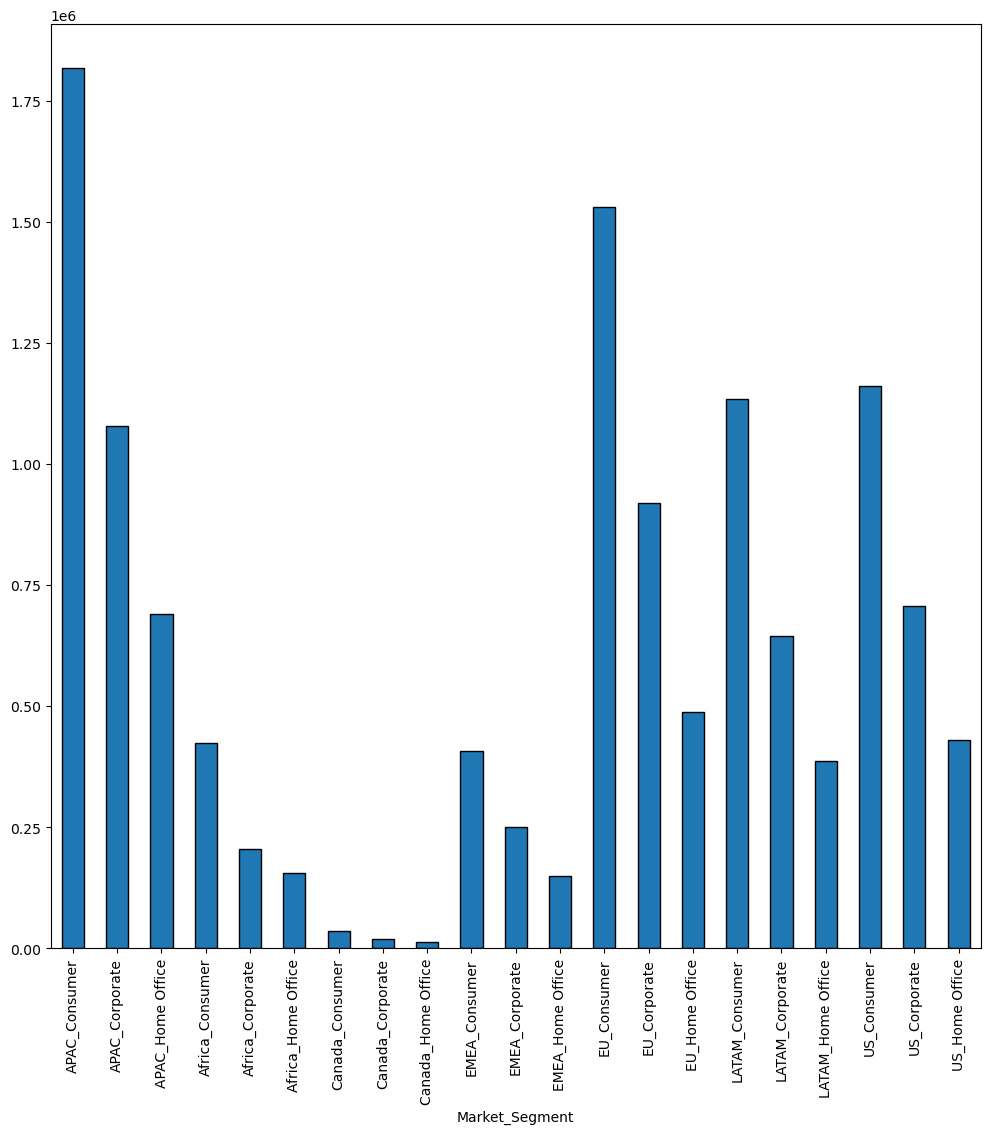

In [15]:
#Plotting Market-sales for all 21 segments

plt.figure(figsize=(12,12))
data.groupby(by='Market_Segment')['Sales'].sum().plot(kind='bar',edgecolor='black')
plt.show()

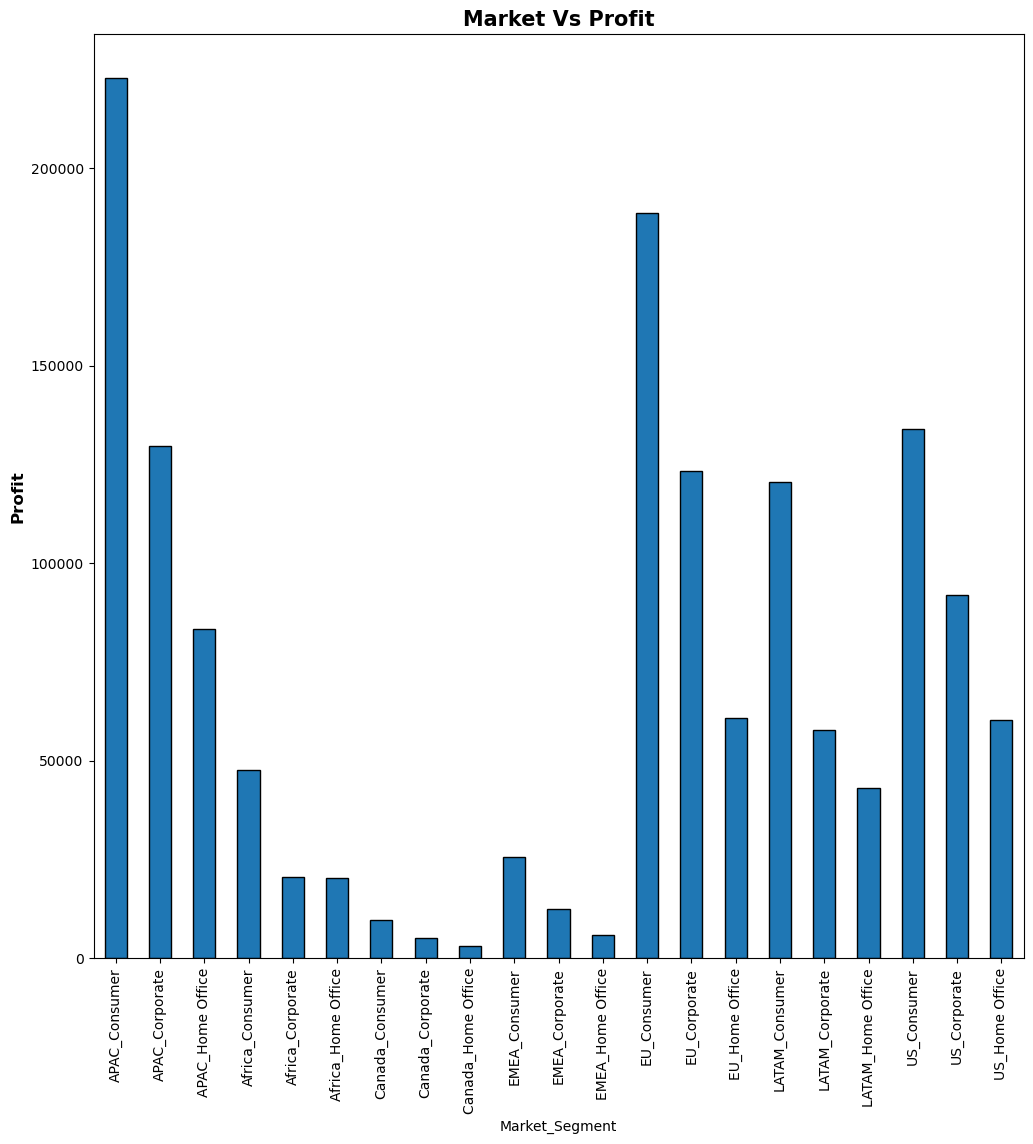

In [16]:
#Plotting Market-Profit for 21 segments

plt.figure(figsize=(12,12))
data.groupby(by='Market_Segment')['Profit'].sum().plot(kind='bar',edgecolor='black')
plt.title('Market Vs Profit',fontweight = 'bold',fontsize = 15,color = 'Black')
plt.ylabel('Profit',fontweight = 'bold',fontsize = 12)
plt.show()

In [17]:
data_pivot=data.pivot_table(index='Order Date',values = 'Profit',columns = 'Market_Segment',aggfunc='sum')

In [18]:
data_pivot.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,991.2825,11.5998,86.4423,475.683,219.096,856.710,3.12,5.7,NaN,-2099.364,...,116.400,-845.8290,501.9315,975.360,1976.98976,1150.88400,-106.48800,762.8067,300.9145,1383.0499
2011-02,1338.8688,4358.8254,-417.4128,1441.926,-490.551,820.302,23.31,NaN,87.99,267.060,...,216.690,-1808.1180,2988.4065,-181.041,902.37752,721.25420,300.19936,500.2865,307.2995,58.1420
2011-03,3747.1632,1213.3386,923.7492,322.140,-586.716,67.320,335.55,NaN,84.03,1598.718,...,78.972,2480.5410,736.9890,503.223,2585.17924,39.07512,285.46400,597.2773,333.0515,-431.5989
2011-04,3846.4746,71.0265,657.1080,292.122,776.691,500.136,55.08,NaN,NaN,-300.879,...,-420.090,2496.6405,1056.1785,63.858,387.72148,259.25600,-421.73440,1155.0757,1393.3828,940.3767
2011-05,3639.9423,2534.1672,-272.1717,110.004,241.338,34.926,77.97,NaN,NaN,568.302,...,262.968,254.0805,1586.2740,201.102,1002.34724,-531.74444,-240.11600,698.9171,2063.5013,-23.7088


In [19]:
#Checking for rows and columns again

data_pivot.shape

(48, 21)

## Splitting Data


In [20]:
train_len = 42
train=data_pivot[:train_len]
test=data_pivot[train_len:]

In [21]:
train.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,991.2825,11.5998,86.4423,475.683,219.096,856.710,3.12,5.7,NaN,-2099.364,...,116.400,-845.8290,501.9315,975.360,1976.98976,1150.88400,-106.48800,762.8067,300.9145,1383.0499
2011-02,1338.8688,4358.8254,-417.4128,1441.926,-490.551,820.302,23.31,NaN,87.99,267.060,...,216.690,-1808.1180,2988.4065,-181.041,902.37752,721.25420,300.19936,500.2865,307.2995,58.1420
2011-03,3747.1632,1213.3386,923.7492,322.140,-586.716,67.320,335.55,NaN,84.03,1598.718,...,78.972,2480.5410,736.9890,503.223,2585.17924,39.07512,285.46400,597.2773,333.0515,-431.5989
2011-04,3846.4746,71.0265,657.1080,292.122,776.691,500.136,55.08,NaN,NaN,-300.879,...,-420.090,2496.6405,1056.1785,63.858,387.72148,259.25600,-421.73440,1155.0757,1393.3828,940.3767
2011-05,3639.9423,2534.1672,-272.1717,110.004,241.338,34.926,77.97,NaN,NaN,568.302,...,262.968,254.0805,1586.2740,201.102,1002.34724,-531.74444,-240.11600,698.9171,2063.5013,-23.7088


## Calculation of Cofficient Of Variance

In [22]:
#Making a dataframe

cov = pd.DataFrame(columns=['Segment','CoV'])

#### As CoV is ratio of standard deviation/mean we can write it as following 
The formula for CoV is :
(𝝈/𝝁),
𝒘𝒉𝒆𝒓𝒆 𝝈 = 𝒔𝒕𝒂𝒏𝒅𝒂𝒓𝒅 𝒅𝒆𝒗𝒊𝒂𝒕𝒊𝒐𝒏 𝒂𝒏𝒅 𝝁 = 𝒎𝒆𝒂𝒏

In [23]:
for i in data_pivot.columns:
    var={'Segment':i,'CoV': np.std(train[i])/np.mean(train[i])}
    cov = cov.append(var,ignore_index = True)

In [24]:
cov.sort_values(by='CoV',ascending =True,inplace=True)

In [25]:
cov

,Segment,CoV
0,APAC_Consumer,0.596404
12,EU_Consumer,0.647485
15,LATAM_Consumer,0.680684
13,EU_Corporate,0.689346
1,APAC_Corporate,0.731926
16,LATAM_Corporate,0.880260
19,US_Corporate,1.027209
2,APAC_Home Office,1.048817
18,US_Consumer,1.095295
14,EU_Home Office,1.114681


## Plotting CoV values

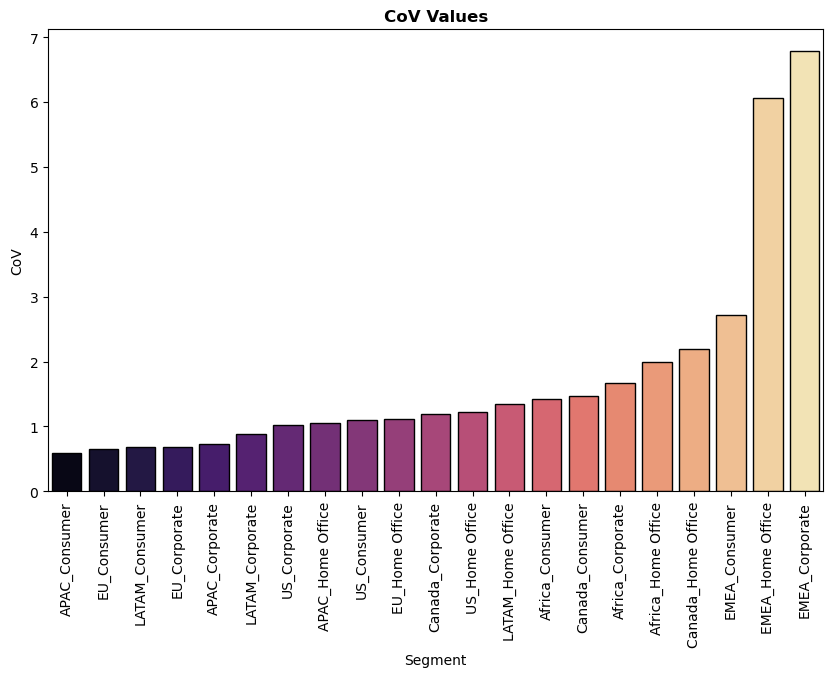

In [26]:
plt.figure(figsize=(10,6))
sns.barplot(x='Segment', y= 'CoV', data=cov, palette='magma',edgecolor='black')
plt.xticks(rotation = 90)
plt.title('CoV Values',fontweight='bold')
plt.show()

 - We can see that Lowest CoV is 0.596404 <br>
 - We can infer that the corresponding Marget Segment is "APAC_Consumer" <br>
 - The most profitable Market Segment is APAC_Consumer
 <hr>

#### It has become evident that APAC_Consumer has the least CoV i.e it is the most stable market segment. As a result of this it makes sense to analyse this market segment only.

## Creating a seperate Data Frame that has data related to APAC_Consumer only

In [27]:
data_final = data[data['Market_Segment']=='APAC_Consumer']
data_final.head()

,Order Date,Segment,Market,Sales,Profit,Market_Segment
2,2013-10,Consumer,APAC,5175.171,919.971,APAC_Consumer
6,2011-11,Consumer,APAC,1822.080,564.840,APAC_Consumer
7,2012-04,Consumer,APAC,5244.840,996.480,APAC_Consumer
14,2013-06,Consumer,APAC,3701.520,1036.080,APAC_Consumer
29,2012-02,Consumer,APAC,1878.720,582.360,APAC_Consumer


In [28]:
#Dropping all the columns expect Sales,Profit and Order Date

data_final.drop(columns =['Segment','Market','Market_Segment'],inplace=True)
data_final.set_index('Order Date')

,Sales,Profit
Order Date,,
2013-10,5175.1710,919.9710
2011-11,1822.0800,564.8400
2012-04,5244.8400,996.4800
2013-06,3701.5200,1036.0800
2012-02,1878.7200,582.3600
...,...,...
2013-01,38.9709,-32.3991
2014-11,6.9000,-0.8400
2011-11,17.2800,-13.9200


In [29]:
data_final =data_final.groupby(by='Order Date').sum()

In [30]:
data_final.head()

,Sales,Profit
Order Date,,
2011-01,15711.7125,991.2825
2011-02,12910.8588,1338.8688
2011-03,19472.5632,3747.1632
2011-04,15440.3046,3846.4746
2011-05,24348.9723,3639.9423


In [31]:
data_final.shape

(48, 2)

## Plotting the data

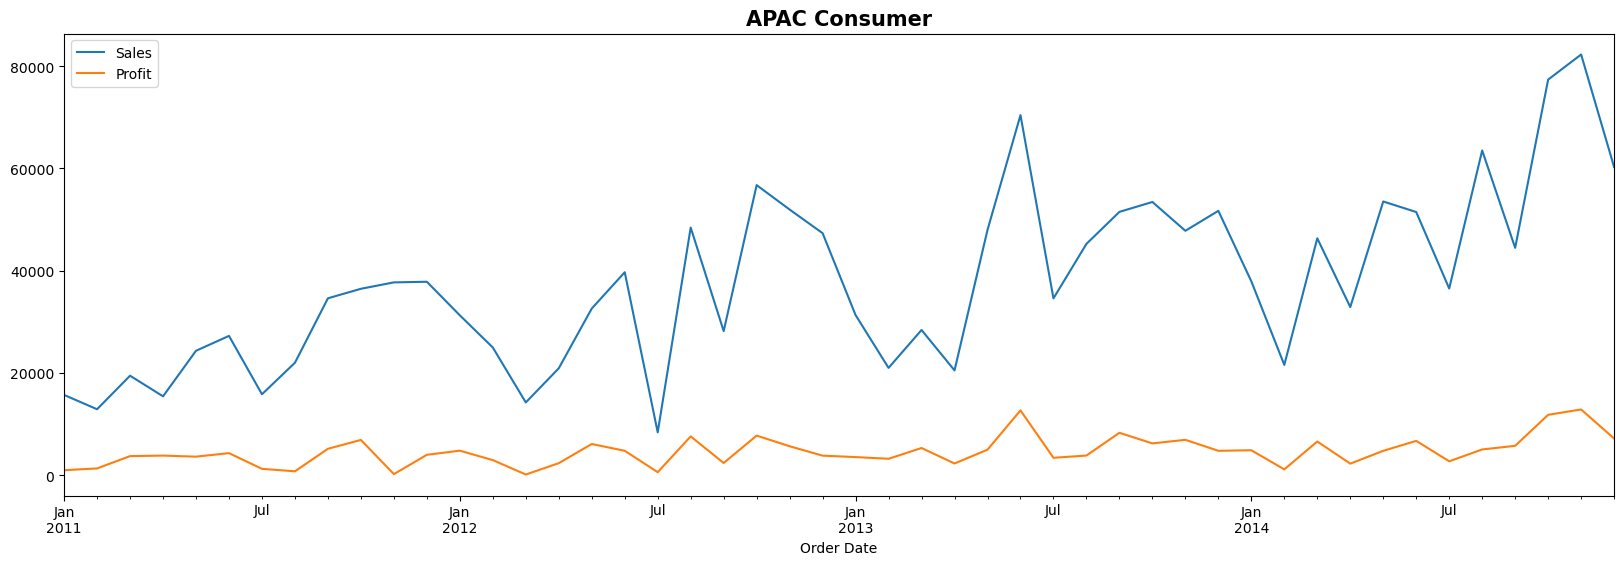

In [32]:
data_final.plot(figsize=(20,6))
plt.legend(loc='best')
plt.title('APAC Consumer',fontweight='bold',fontsize=15)
plt.show()

### Outlier Detection

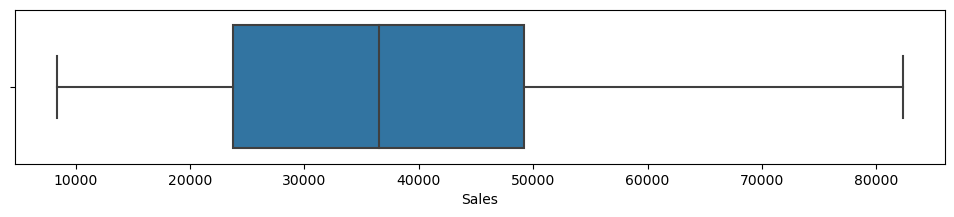

In [33]:
import seaborn as sns
fig = plt.subplots(figsize=(12, 2))
ax = sns.boxplot(x=data_final['Sales'],whis=1.5)

### Decomposing the data to find any trend or seasonality

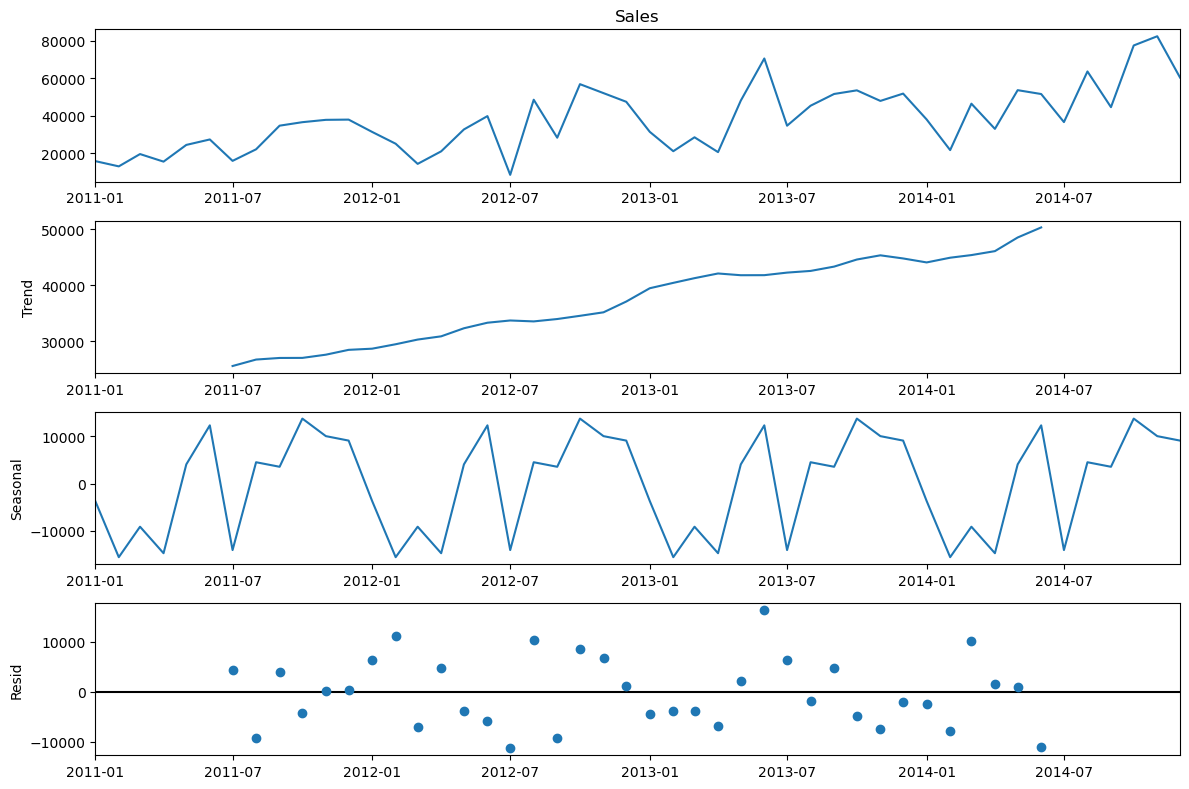

In [34]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 8
from statsmodels.tsa.seasonal import seasonal_decompose
data_final.Sales.interpolate(inplace = True)
data_final.Sales.index=data_final.Sales.index.to_timestamp()
decomposition = seasonal_decompose(data_final.Sales)
fig = decomposition.plot()
plt.show()

- We can see some amount seasonality and upward Tread both are present in the data.

##### Now we will built and evalute the models

## Buliding And Evaluting Models
<hr>

In [35]:
#Converting datetime to timestamp
data_final = data_final.to_timestamp() 

In [36]:
train=data_final[:train_len]
test=data_final[train_len:]

In [37]:
train.head()

,Sales,Profit
Order Date,,
2011-01-01,15711.7125,991.2825
2011-02-01,12910.8588,1338.8688
2011-03-01,19472.5632,3747.1632
2011-04-01,15440.3046,3846.4746
2011-05-01,24348.9723,3639.9423


In [38]:
test.shape

(6, 2)

## NAIVE Method 
<hr>

In [39]:
y_hat_naive = test.copy()
y_hat_naive['Naive Forecast'] = train['Sales'][train_len-1]

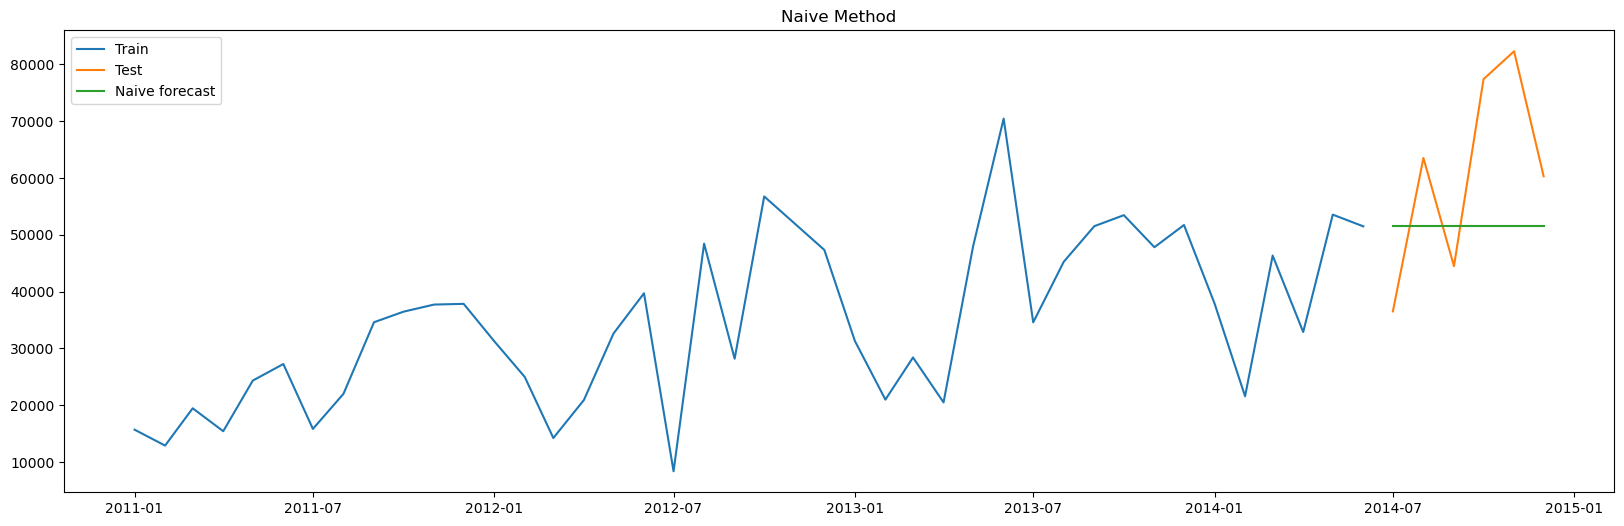

In [40]:
# plotting of train,test and forecast

plt.figure(figsize=(20,6))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_naive['Naive Forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

- As we can see in the plot,in order to forecast the sales from month 2014-07 to 2015-01 we took the last or previous month data which is 2014-06
- We can see that the forecast for the next six months is the same value(green line) as the last observation of the blue line

In [41]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_naive['Naive Forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_naive['Naive Forecast'])/test['Sales'])*100,2)

results = pd.DataFrame({'Method':['Naive Forecast Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = results[['Method', 'RMSE', 'MAPE']]

In [42]:
results

,Method,RMSE,MAPE
0,Naive Forecast Method,18774.05,26.86


## Simple Average Method

In [43]:
#Using Simple Average Method
y_hat_avg = test.copy()
y_hat_avg['Average Forecast']=train['Sales'].mean()

##### Plotting Simple average Method

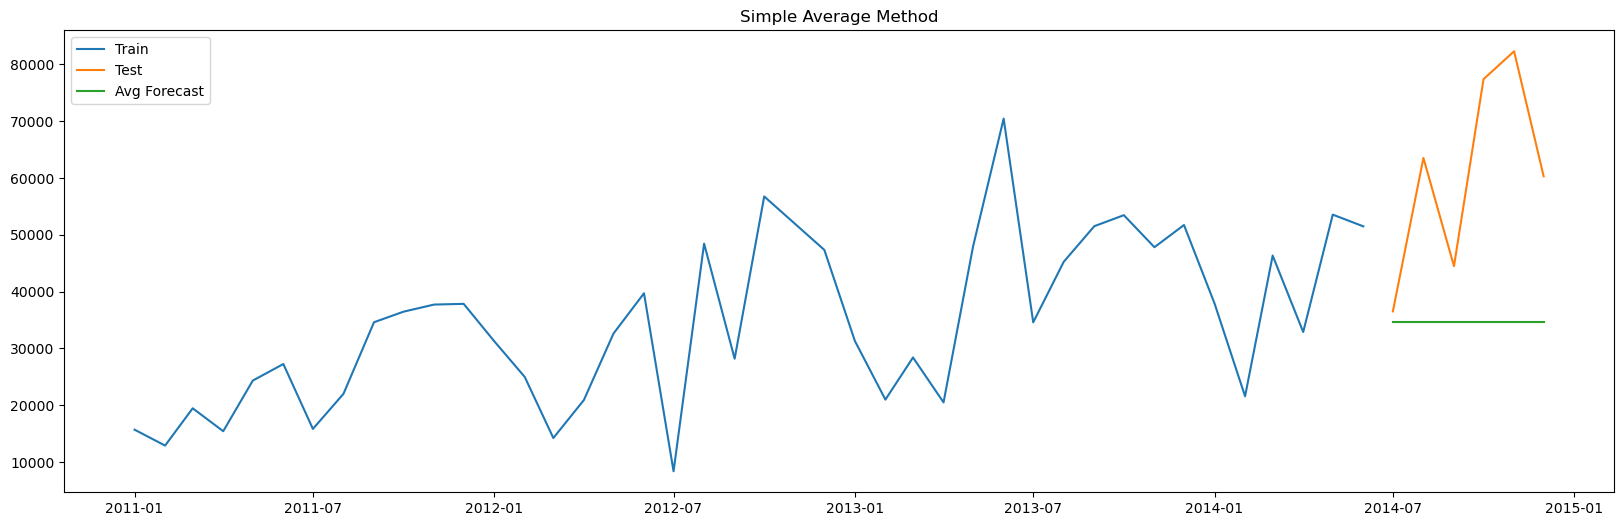

In [44]:
plt.figure(figsize=(20,6))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['Average Forecast'], label='Avg Forecast')
plt.legend(loc='best')
plt.title('Simple Average Method')
plt.show()

### Calculating RMSE and MAPE 

In [45]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['Average Forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_avg['Average Forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple Average Method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Forecast Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18


## Simple Moving Average

In [46]:
y_hat_sma=data_final.copy()
ma_window=2
y_hat_sma['sma_forecast'] = data_final['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

### Plotting the data 

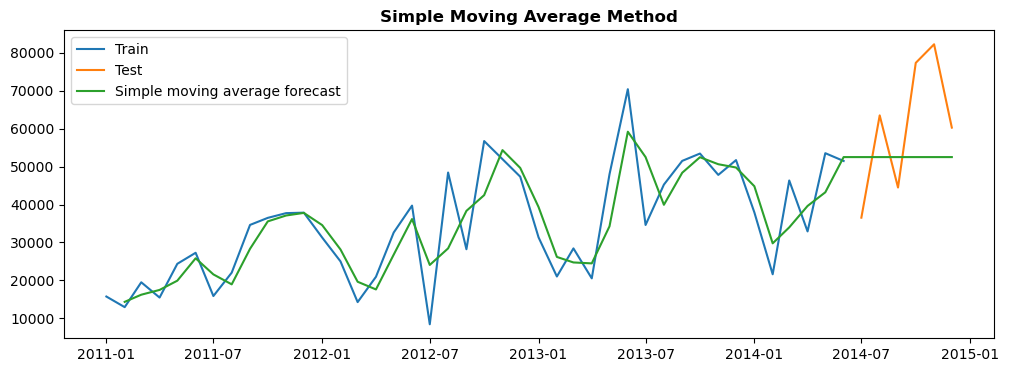

In [47]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method', fontweight= 'bold')
plt.show()

## Calculating RSME and MAPE

In [48]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sma['sma_forecast'][train_len:])/test['Sales'])*100,2)

#Results
tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]


In [49]:
results

,Method,RMSE,MAPE
0,Naive Forecast Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple moving average forecast,18287.55,26.73


## Smoothing Methods
<hr>


### Simple Exponential Smoothing 

In [50]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(6)

D:\Python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


## Plotting of data

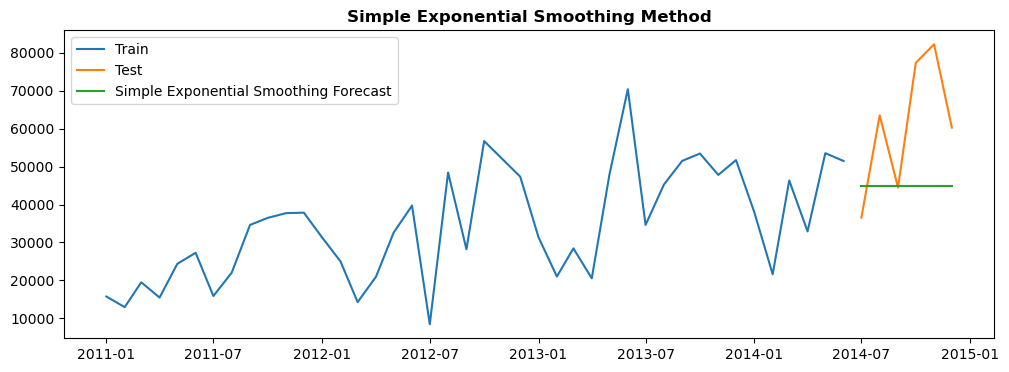

In [51]:
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple Exponential Smoothing Forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method',fontweight='bold')
plt.show()

- The level of the time series is captured

## Calculating RMSE and MAPE

In [52]:
rmse = np.sqrt(mean_squared_error(test['Sales'],y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

#Results
tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive Forecast Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple moving average forecast,18287.55,26.73
0,Simple exponential smoothing forecast,22824.62,27.70


### Holt's Exponential Smoothing

In [53]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.1464285714285714, 'smoothing_trend': 0.128125, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 10555.930159999996, 'initial_trend': 2155.007810909092, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


D:\Python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


### Plotting the data

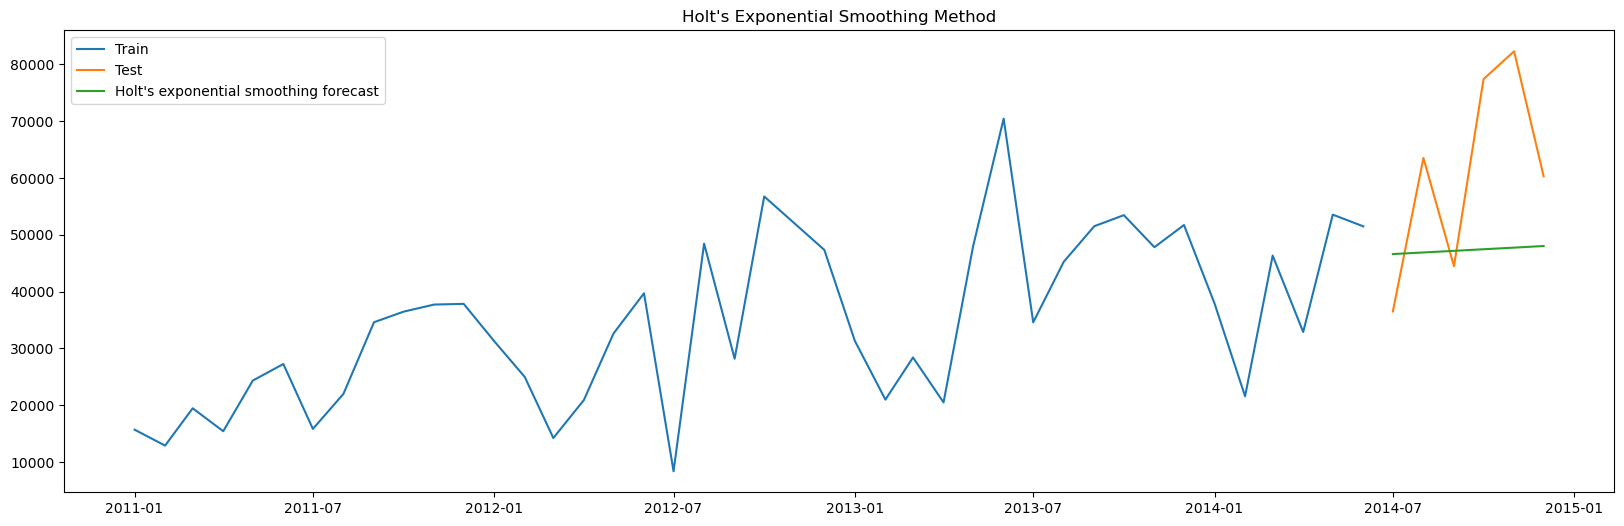

In [54]:
plt.figure(figsize=(20,6))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

### Calculating RMSE and MAPE

In [55]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Forecast Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple moving average forecast,18287.55,26.73
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,20916.20,26.81


## Holt Winters additive method with trend and seasonality

In [56]:
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.005, 'smoothing_trend': 0.005, 'smoothing_seasonal': 0.0001, 'damping_trend': nan, 'initial_level': 25191.878854999984, 'initial_trend': 549.1511154545474, 'initial_seasons': array([ -3046.57535417, -12233.28766042, -14734.34056667, -16050.40451667,
         2962.22100208,  17242.34903958, -17814.35478542,   4804.01762083,
          623.89353958,  15536.36958958,  13175.71666458,   9534.39542708]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


D:\Python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


## Plotting of Data

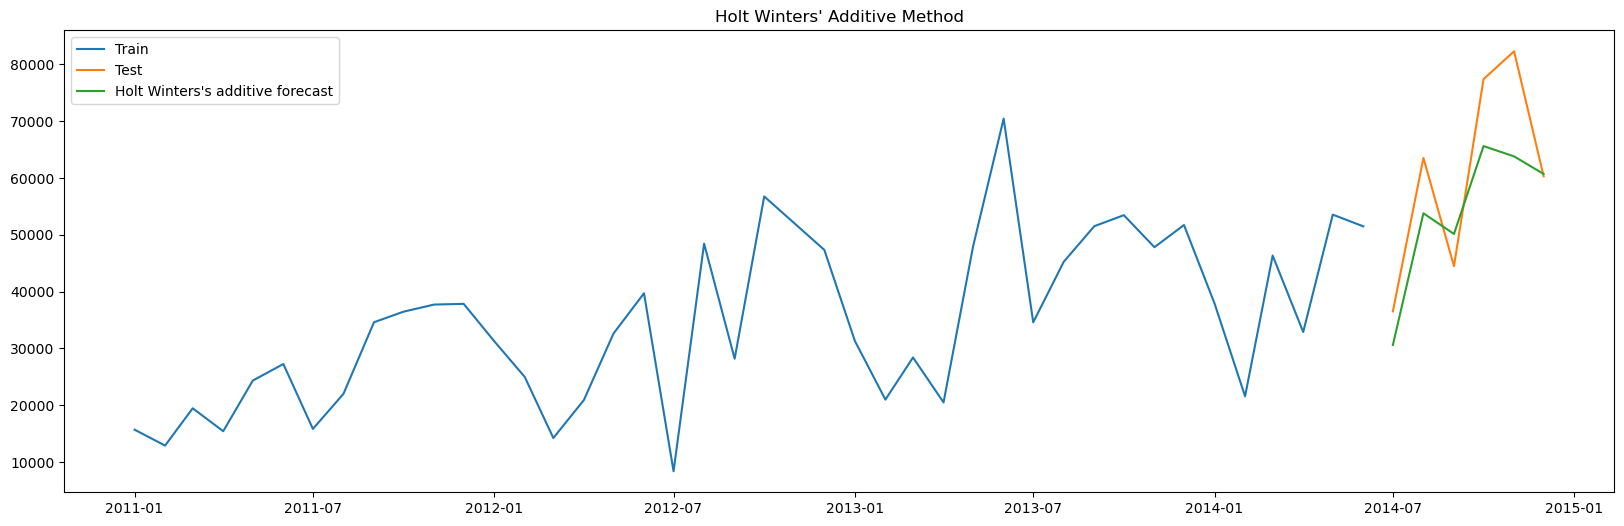

In [57]:
plt.figure(figsize=(20,6))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method')
plt.show()

- We were able to capture good amount of seasonal variation and even the trend.

### Calulate RMSE and MAPE

In [58]:
rmse = np.sqrt(mean_squared_error(test['Sales'],y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['hw_forecast'])/test['Sales'])*100,2)

#Results
tempResults = pd.DataFrame({'Method':["Holt Winter's Additive Method"], 'RMSE': [rmse],'MAPE': [mape]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Forecast Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple moving average forecast,18287.55,26.73
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,20916.20,26.81
0,Holt Winter's Additive Method,10350.33,13.77


## Holt Winter's multiplicative method 

In [59]:
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.005, 'smoothing_trend': 0.005, 'smoothing_seasonal': 0.07107142857142858, 'damping_trend': nan, 'initial_level': 25191.878854999984, 'initial_trend': 549.1511154545474, 'initial_seasons': array([0.93074061, 0.67529696, 0.57227633, 0.57532186, 1.06552983,
       1.42137084, 0.42860295, 1.11971051, 1.04228985, 1.47741289,
       1.40453147, 1.28691591]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


D:\Python\lib\site-packages\statsmodels\tsa\holtwinters\model.py:915: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


## Plotting the Data

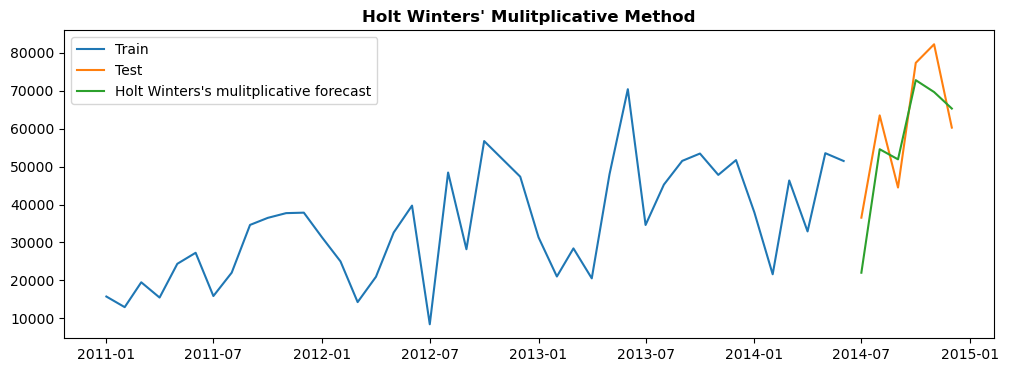

In [60]:
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method', fontweight='bold')
plt.show()

## Calculating RMSE and MAPE

In [61]:
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['hw_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive Forecast Method,18774.05,26.86
0,Simple Average Method,30846.00,38.18
0,Simple moving average forecast,18287.55,26.73
0,Simple exponential smoothing forecast,22824.62,27.70
0,Holt's exponential smoothing method,20916.20,26.81
0,Holt Winter's Additive Method,10350.33,13.77
0,Holt Winters' multiplicative method,9585.23,16.69


# Conclusion
<hr>

- From the Smoothing Techniques performed we can conclude that Holt Winter's Additive Method is giving the better forecast to of the sales for the 6 months, since the predicted sales are closer to the actual sales.
- We could also see that the RMSE and MAPE values is the least among all the methods done above.